# How to use `asteriks`

`asteriks` is designed to extract data from moving objects from Kepler/K2 data. This quick tutorial will show you  the basic workflow of `asteriks`. (Make sure you follow our installation guide first!) 

First we'll load `asteriks`! You might also want matplotlib and numpy to manipulate some of the arrays.

In [19]:
% load_ext autoreload
% autoreload 2

%matplotlib inline
import asteriks as a
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create an object

We'll create an object first below. We've passed in a name and a campaign for the object. If you don't pass a campaign, `asteriks` will try to find one for you.

In [20]:
obj = a.object('15529', 6)

In [21]:
obj

asteriks.object (15529)

You can read some of the object info easily by typing `obj.info()`.

In [6]:
obj.info()

15529
-----
Campaign:	6
Alternate Names: ['15529', '15529', '2000 AA80']
Obs Start:	2015-07-13T22:59:48.650
Obs End:	2015-09-30T20:56:48.448

Number of Apertures: 	6
Aperture Radius:	8 Pixel(s)


## Fetching JPL and MAST meta data.

The ephemeris data for the object is stored in the JPL Small Bodies Database. The files containing the Kepler/K2 data are stored at MAST. To work with this object we need to fetch the meta data on the object from both these services. We can do that with the `fetch()` function.

In [23]:
obj.fetch()

We now have access to this meta data. The MAST data is kept in `obj.file_data`. It contains a dataframe of all the MAST meta data. Below is the first 5 lines from that meta data.

In [25]:
obj.file_data.head(5)

,Dec,EPIC,Investigation ID,RA,campaign,channel,url
0,-5.220394,200046167,GO6025,201.538558,06,70,http://archive.stsci.edu/missions/k2/target_pi...
1,-5.220925,200046168,GO6025,201.539600,06,70,http://archive.stsci.edu/missions/k2/target_pi...
2,-5.221681,200046169,GO6025,201.540617,06,70,http://archive.stsci.edu/missions/k2/target_pi...
3,-5.221917,200046170,GO6025,201.541704,06,70,http://archive.stsci.edu/missions/k2/target_pi...
4,-5.224086,200046171,GO6025,201.542525,06,70,http://archive.stsci.edu/missions/k2/target_pi...


We also have the JPL meta data in the `obj.jpl_data` variable. `jpl_data` contains a list of 7 dataframes, one for each 'lagged' aperture. The first frame contains the data for the aperture centered on the object.

In [27]:
obj.jpl_data[0].head(5)

,jd,cadenceno,ra,dec,campaign,onsil,incampaign,channel,velocity,CONTAMINATEDAPERTUREFLAG,Row_06_50,Column_06_50,Row_06_69,Column_06_69,Row_06_70,Column_06_70
0,2.457264e+06,113664.0,201.540138,-5.218608,6,True,True,70.0,3.309420,False,974,-2566,970,2211,970,14
1,2.457265e+06,113665.0,201.541783,-5.219347,6,True,True,70.0,3.309420,False,974,-2564,970,2210,969,16
2,2.457265e+06,113666.0,201.543429,-5.220086,6,True,True,70.0,3.310070,False,973,-2562,969,2208,969,17
3,2.457265e+06,113667.0,201.545075,-5.220825,6,True,True,70.0,3.310721,False,973,-2561,969,2206,969,19
4,2.457265e+06,113668.0,201.546721,-5.221564,6,True,True,70.0,3.311371,False,972,-2559,969,2205,968,20


Now we have the meta data we can plot our object on the Kepler/K2 focal plane with the `plotTrack()` method.

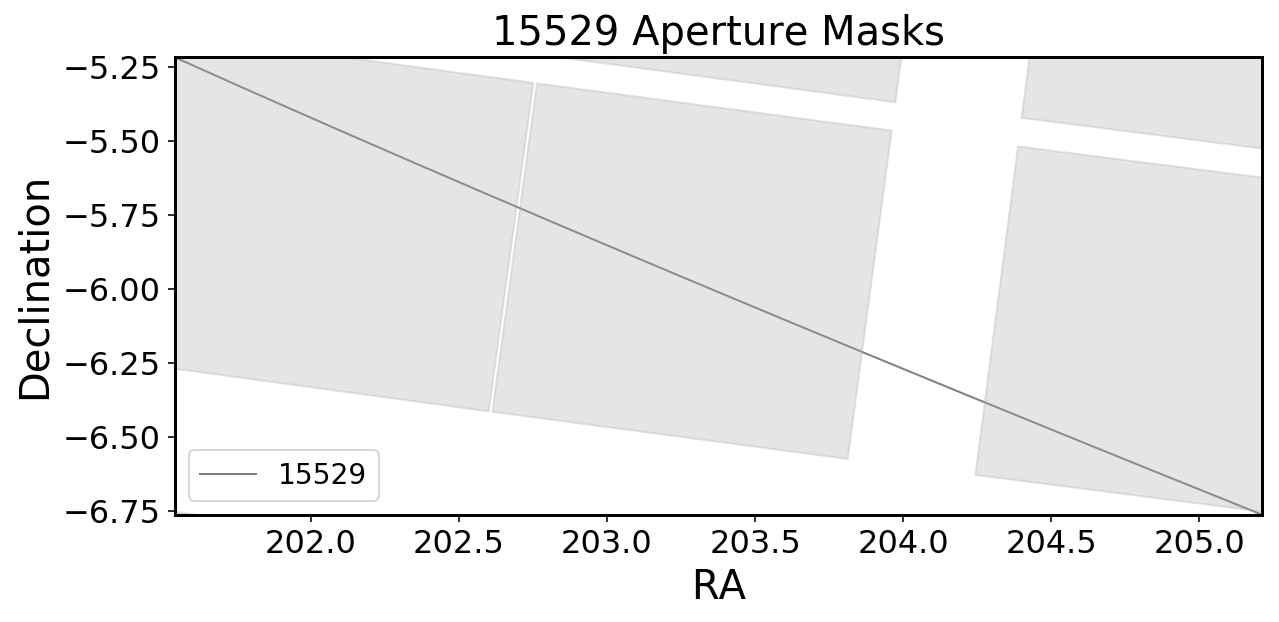

In [18]:
obj.plotTrack()

You can also try the `animateTrack()` function for an animation of the asteroid path across the focal plane!

## Building the data

Now we have the meta data, we need to build a moving TPF. To do this you can use the `build()` method. This will download all the files in the `file_data` table and construct TPFs based on the ephemerides in `jpl_data`. This will take a while if you have a slow internet connection. The files will be stored in your astropy cache (usually in `~/.astropy/cache/download/...`).  

In [33]:
obj.build()

Inflating Files	: 100%|██████████| 920/920 [03:32<00:00,  4.33it/s]
/Users/ch/miniconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:907: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/ch/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Now that you have built the data you can access additional plots. You can plot the time averaged TPF with `plotTPF`.

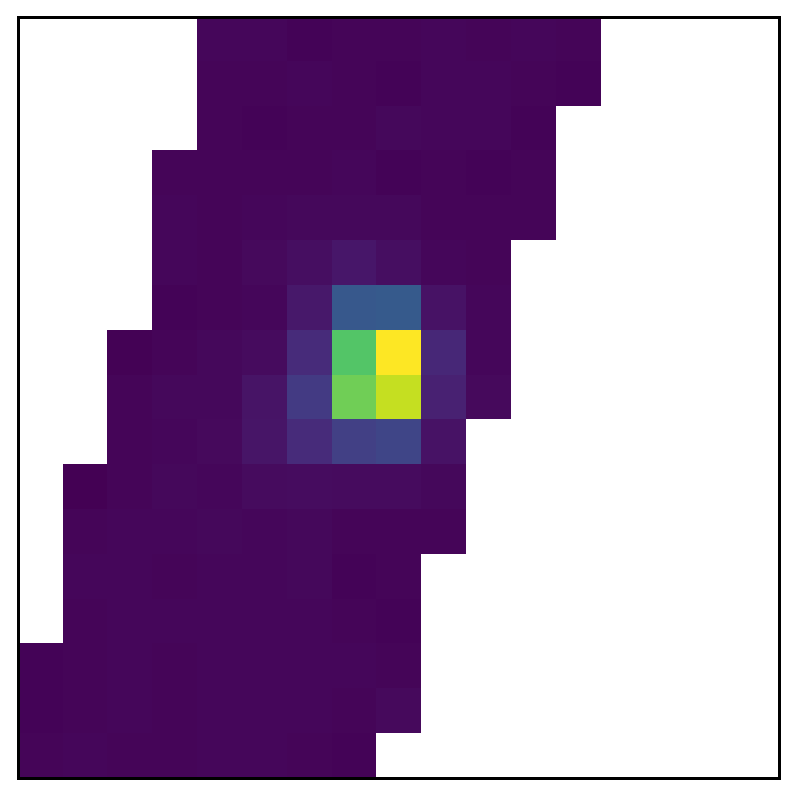

In [34]:
obj.plotTPF()

You can plot all of the light curves `asteriks` generates for all apertures using `plotLightCurves`. You can plot the optimal light curve using `plotBestLightCurve`.

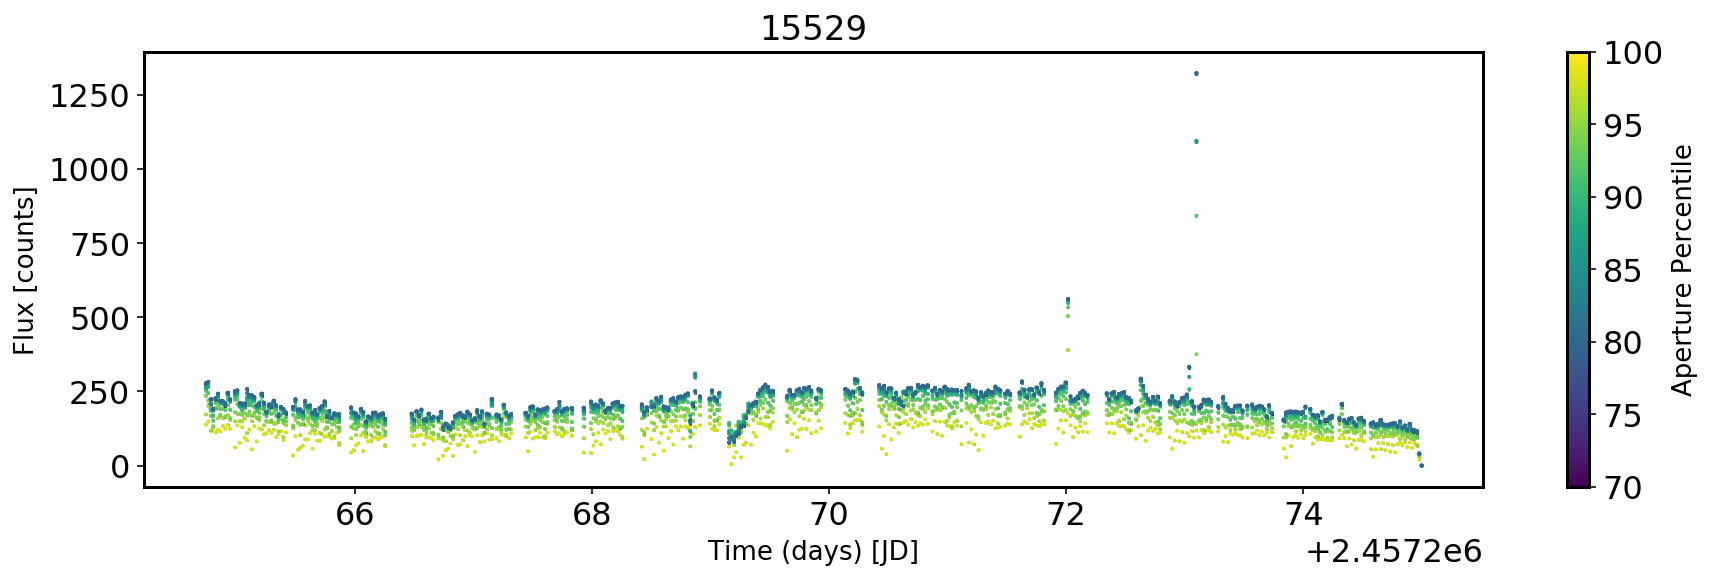

In [38]:
obj.plotLightCurves()

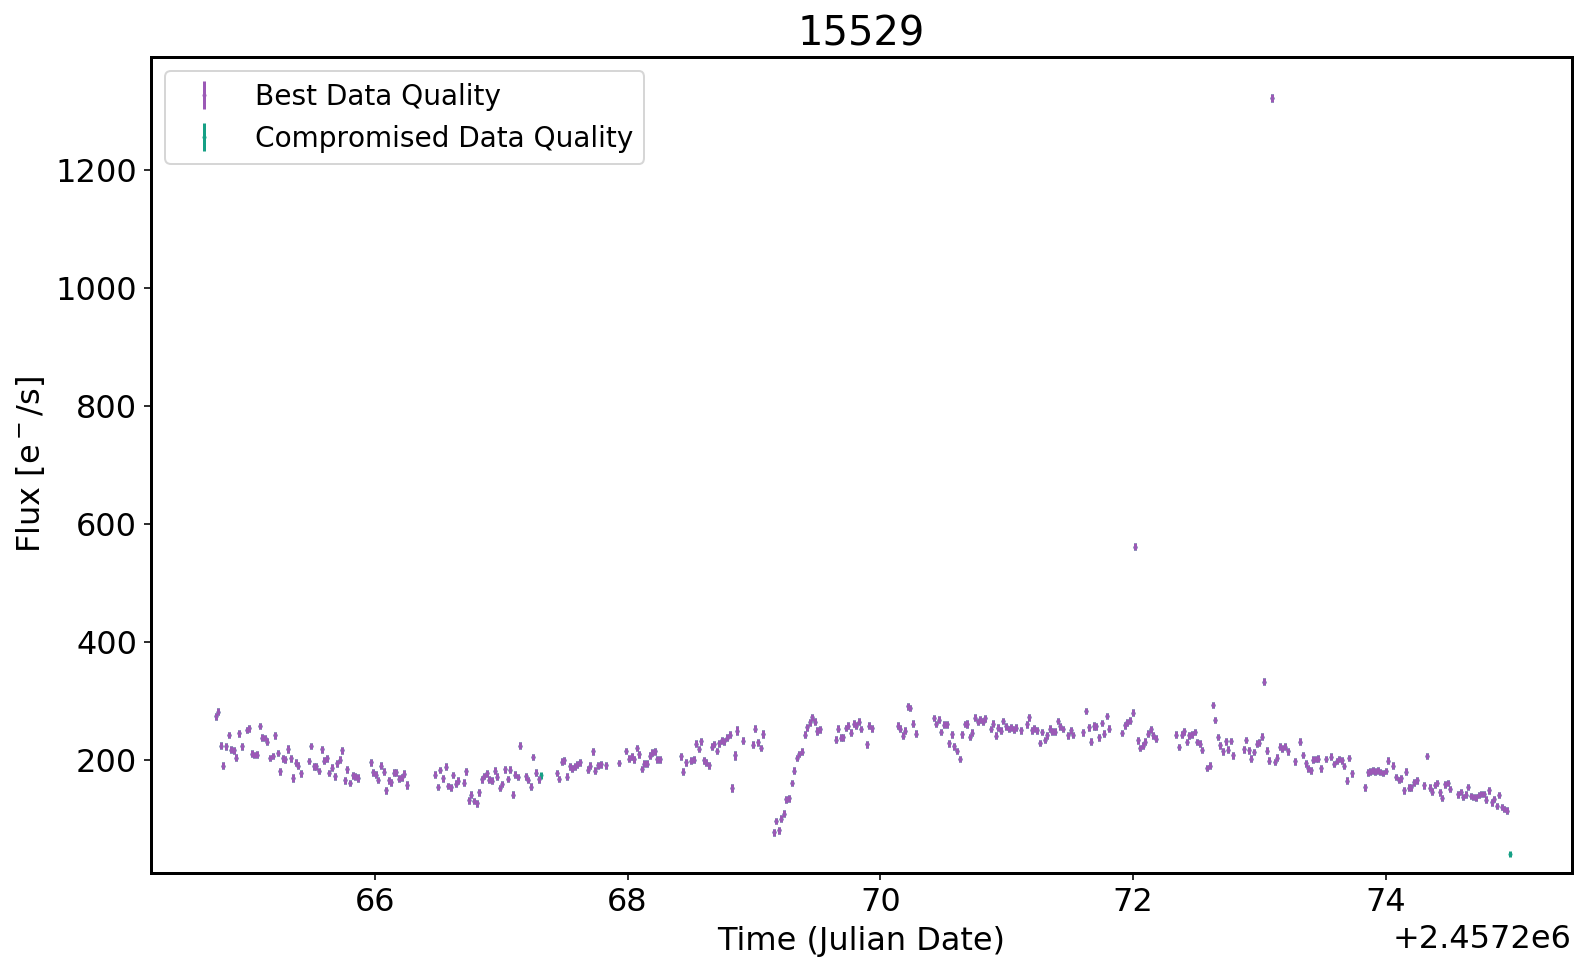

In [39]:
obj.plotBestLightCurve()

You can write the data to fits files using `writeLightCurve` and `writeTPF`.

In [40]:
obj.writeLightCurve()

In [42]:
obj.writeTPF()

Finally, you can create `lightkurve` objects of the light curves using the `to_lightcurve()` method.

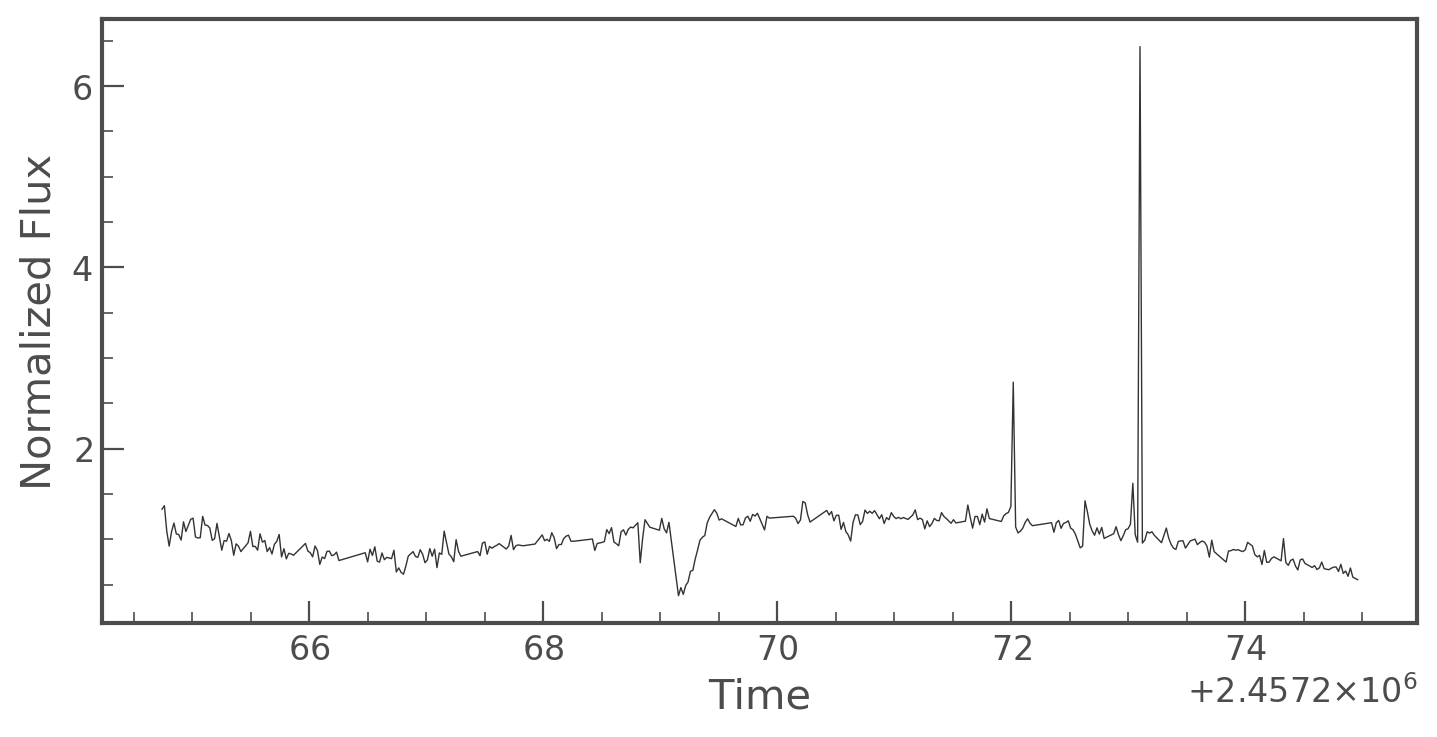

In [43]:
lc = obj.to_lightcurve()
lc.plot()